![alt text](https://drive.google.com/uc?id=1ICkEO0XX8hdvpAPERnCAMwsuLdd1WjDr)


Assalamualaikum warahmatullahi wabarakatuh.

***Robbi Zidni Ilma Warzuqni Fahma***

Semoga Allah memberi kemudahan untuk kita memperoleh ilmu yang bermanfaat.

Ini adalah notebook yang disusun untuk **Kelas Mahir Pejuang Data Sains 2.0** .

Ini adalah **Notebook Model Regresi dengsn Scikit-Learn**:

## **Hasil Yang Ingin Dicapai**
1. Memahami model regresi
2. Membangun model regresi dengan modul scikit-learn python
3. Mengaplikasikan model regresi pada dataset real

### ***!!!***

***Sebelum memulai mempelajari notebook ini, jangan lupa untuk menyalinnya di drive masing-masing ya.***

### ***!!!***


##**Apa sih itu Regresi?**

**Apa sih itu Regresi?**

Regresi adalah **ukuran hubungan** ***antara nilai rata-rata dari satu variabel*** (misalnya keluaran) ***dan nilai yang sesuai dari variabel lain*** (misalnya waktu dan biaya).

**Model regresi** adalah ***model yang menghasilkan nilai regresi.***

Data yang digunakan untuk model regresi adalah ***data kontinu***


**Apa sih Machine Learning?**

Machine learning adalah aplikasi dari disiplin ilmu kecerdasan buatan (Artificial Intelligence) yang ***menggunakan teknik statistika*** untuk ***menghasilkan suatu model otomatis dari sekumpulan data***, dengan tujuan memberikan komputer kemampuan untuk **"belajar"**.


**Machine Learning Regresi**

![alt text](https://developers.google.com/machine-learning/crash-course/images/LossSideBySide.png)

**Tujuan kita** adalah menghasilkan ***garis regresi yang mendekati pola titik-titik data yang sesungguhnya dengan kesalahan sekecil mungkin***.


**Dua tipe Machine Learning Regresi Secara Umum**

1. **Model Regresi Statistik**, seperti Linear, Non-Linear, Ridge, Lasso, dll

2. **Model Regresi dengan Jaringan Syaraf Tiruan** (Di Bahas Nanti Yaa)

Contoh Data Dua Variabel

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/eliyanto29/Regression-Analysis/master/datacontoh.csv')

In [2]:
df.describe()

,Total Salary,Total Compensation
count,886102.000000,886102.000000
mean,59307.005700,82943.913636
std,55142.729663,74327.989722
min,-33808.200000,-42615.240000
25%,5168.100000,6913.490000
50%,53720.680000,78737.730000
75%,93357.710000,133802.255000
max,658867.570000,807175.090000


Scatter Plot Data

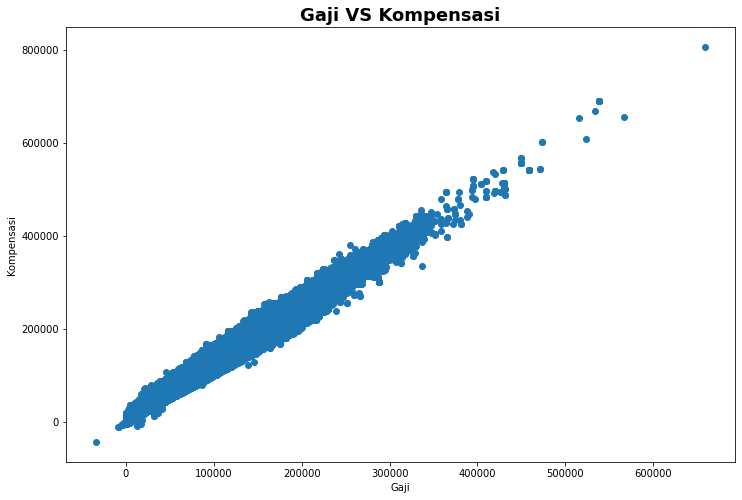

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#Menentukan ukuran gambar
plt.figure(figsize=(12,8))
#Ploting
plt.title('Gaji VS Kompensasi', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.scatter(df['Total Salary'], df['Total Compensation'])

plt.xlabel('Gaji')
plt.ylabel('Kompensasi')

plt.savefig('Gaji VS Kompensasi.png', dpi=300)

plt.show()

Model Regresi Linier y=b0+b1x
b1 [1.36517728]
b0 5162.147976209977
MSE 120997069.59083177
Akurasi 97.95179773615776 %


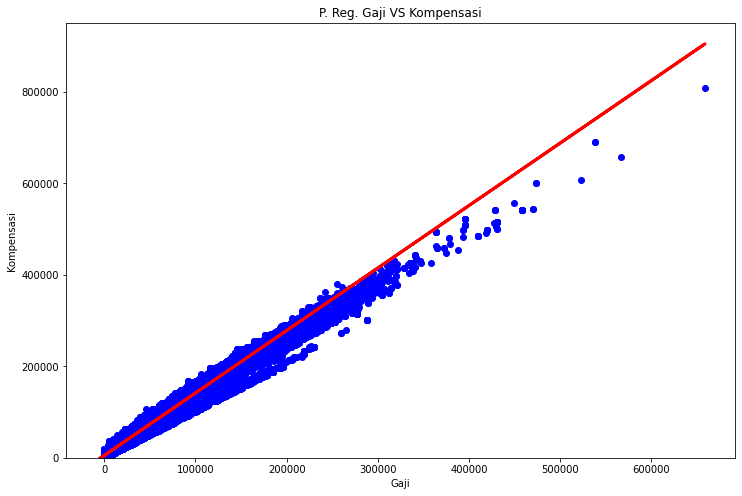

In [4]:
#Membangun model Regresi Linear
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(12,8))

#Mendefinisikan variabel X dan Y
X=np.array(df['Total Salary']).reshape((-1,1))
Y=np.array(df['Total Compensation'])

#Memecah data x menjadi data latih dan data uji
X_latih=X[:200000]
X_uji=X[-80110:]

#Memecah data y menjadi data latih dan data uji
Y_latih=Y[:200000]
Y_uji=Y[-80110:]

#Membuat model regresi linier
regr = linear_model.LinearRegression()

#Memfiting data latih ke dalam model regresi linier
regr.fit(X_latih,Y_latih)

#Hasil prediksi nilai y berdasarkan model regresi linier
Y_pred= regr.predict(X_latih)

#Mencetak parameter model regresi linier
print('Model Regresi Linier y=b0+b1x')
print('b1', regr.coef_)
print('b0', regr.intercept_)

#Mencetak MSE model regresi linier
MSE=mean_squared_error(Y_latih,Y_pred)
print('MSE', MSE)
skor=r2_score(Y_latih,Y_pred)
print('Akurasi',skor*100, '%')


#Plot data dan model
plt.scatter(X_latih, Y_latih,  color='blue')
plt.plot(X_latih, Y_pred, color='red', linewidth=3)

plt.title('P. Reg. Gaji VS Kompensasi')
plt.xlabel('Gaji')
plt.ylabel('Kompensasi')
plt.ylim(0,)
#plt.savefig('Pers Regresi Gaji VS Kompensasi.png', dpi=300)

plt.show()

##**Real Project Model Regresi**

In [7]:
#Mengimpor modul
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

In [8]:
import warnings
warnings.filterwarnings('ignore')

###**Mengakses Dataset**

In [9]:
#Membuka dataset dalam bentuk dataframe
df = pd.read_csv('https://raw.githubusercontent.com/eliyanto29/Regression-Analysis/master/train.csv')

In [10]:
#Melihat 5 data pertama
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###**Eksplorasi Data(Exploration Data Analysis)**

In [11]:
#Melihat ukuran data
df.shape

(1460, 81)

In [12]:
#Melihat statistik deskriptif dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


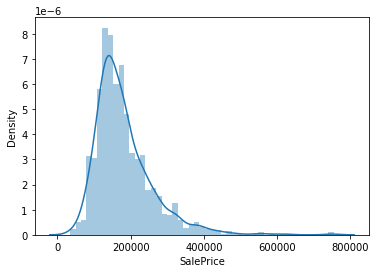

In [13]:
#Melihat distribusi kolom target(harga rumah)
sns.distplot(df["SalePrice"])

In [14]:
#Melihat informasi kolom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
#Melihat nilai korelasi antar variabel numerik
numericfeats=df.dtypes[df.dtypes != 'object'].index

In [16]:
numericfeats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

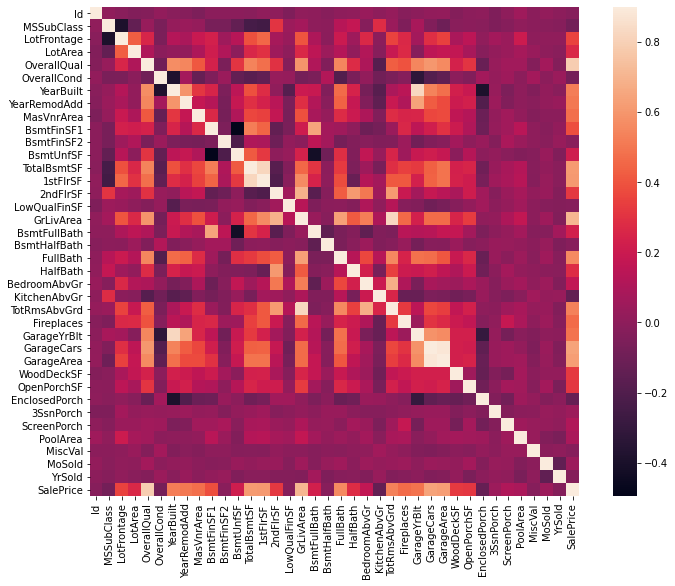

In [17]:
cormat=df[numericfeats].corr()

plt.subplots(figsize=(12,9))
sns.heatmap(cormat, vmax=0.9, square=True)

###**Data Cleaning**

In [18]:
#Kodifikasi untuk data bertipe kategori
df=pd.get_dummies(df, drop_first=True)

In [19]:
df.shape

(1460, 247)

In [ ]:
df.head()

In [20]:
#Mengisi missing value
df=df.fillna(df.mean())

In [21]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


###**Normalisasi data target**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ed02c3790>,
      dtype=object)

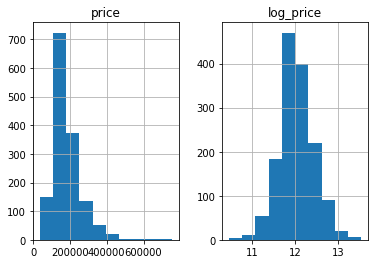

In [22]:
price=pd.DataFrame({'price':df['SalePrice'], 'log_price':np.log1p(df['SalePrice'])})
price.hist()

In [23]:
df['SalePrice']=np.log1p(df['SalePrice'])

###**Membangun Model Regresi**

In [24]:
df=df.set_index('Id')

#Membagi dataset menjadi variabel x dan y
X=df.drop('SalePrice', axis=1)
y=df['SalePrice']

In [25]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_score

In [26]:
def rmse_cv(model):
  return np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))

In [27]:
# Model 1: Regresi Linear
model_lr=LinearRegression()
rmse_cv(model_lr).mean()

0.18503846189176332

In [28]:
# Model 2: Regression Ridge 
model_ridge = RidgeCV(alphas=[1, 0.1, 0.01, 0.0005])
rmse_cv(model_ridge).mean()


0.14627075801581477

In [29]:
# Model 3: Regression Lasso 
model_lasso = LassoCV(alphas=[1, 0.1, 0.01, 0.0005])
rmse_cv(model_lasso).mean()

0.14229021864100805

**Kesimpulan**: Model regresi terbaik adalah Regresi Lasso

###**Melihat variabel utama(paling berpengaruh)**



In [30]:
coef=pd.Series(model_lasso.fit(X,y).coef_, index=X.columns)

In [31]:
imp_coef=pd.concat([coef.sort_values().head(10),
                    coef.sort_values().tail(10)])

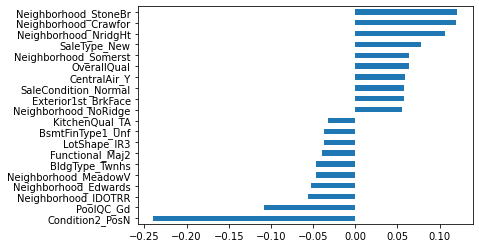

In [32]:
imp_coef.plot(kind='barh')

### **Mengekspor model ke dalam file Pickle**

Menyiapkan model untuk proses selanjutnya

In [33]:
import pickle
model_lasso.fit(X,y)
pickle.dump(model_lasso, open('model.pkl','wb'))